In [1386]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [1387]:
data=pd.read_csv("Fraud Detection Dataset.csv")

In [1388]:
data.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [1389]:
#firstly lets check for null values and the types of our dataset

In [1390]:
print(data.dtypes)
print(data.isnull().sum()*100/len(data))

Transaction_ID                       object
User_ID                               int64
Transaction_Amount                  float64
Transaction_Type                     object
Time_of_Transaction                 float64
Device_Used                          object
Location                             object
Previous_Fraudulent_Transactions      int64
Account_Age                           int64
Number_of_Transactions_Last_24H       int64
Payment_Method                       object
Fraudulent                            int64
dtype: object
Transaction_ID                      0.000000
User_ID                             0.000000
Transaction_Amount                  4.941176
Transaction_Type                    0.000000
Time_of_Transaction                 5.003922
Device_Used                         4.849020
Location                            4.994118
Previous_Fraudulent_Transactions    0.000000
Account_Age                         0.000000
Number_of_Transactions_Last_24H     0.000000
Payment_

In [1391]:
#It can be seen that the percentage of null values is minimal for the bellow features
#Transaction_Amount
#Time_of_Transaction
#Device_Used
#Payment_Method


In [1392]:
#Handling null values
#----------
#"Since the null values represent a small percentage of the data, they can be handled by filling them with the most frequent
#observation (mode) for categorical features or "unknown, or with the mean or median for numerical features
for col in data.columns:
    if data[col].dtype == 'object':  
        data[col] = data[col].fillna('Unknown')  
    else:  
        data[col] = data[col].fillna(data[col].mean())

In [1393]:
#outlier detection for numerical features 

In [1394]:
data.isnull().any().unique()

array([False])

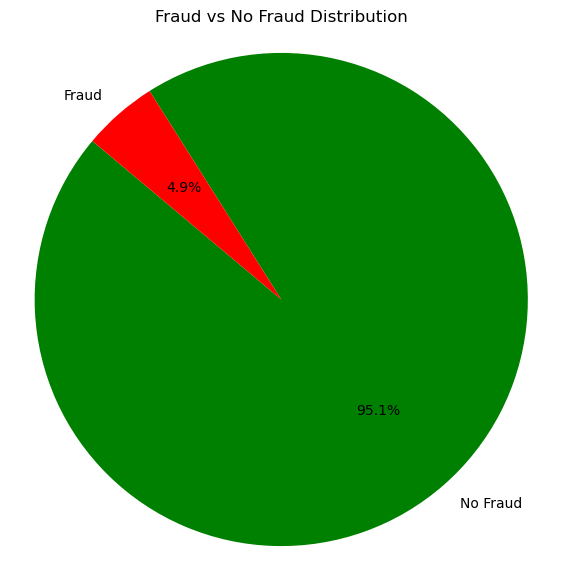

In [1395]:
import pandas as pd
import matplotlib.pyplot as plt



# Count Fraud vs No Fraud cases
fraud_counts = data['Fraudulent'].value_counts()

# Plotting Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(fraud_counts, 
        labels=['No Fraud', 'Fraud'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['green', 'red'])

plt.title('Fraud vs No Fraud Distribution')
plt.axis('equal')  # Equal aspect ratio for perfect circle
plt.show()


In [1396]:
#Heavy unbalanced dataset as most fraud datasets

In [1397]:
data.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0000,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0000,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,11.4884,Mobile,Unknown,3,115,9,Unknown,0
3,T4,2294,100.10,Bill Payment,15.0000,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0000,Mobile,San Francisco,2,57,7,Credit Card,0


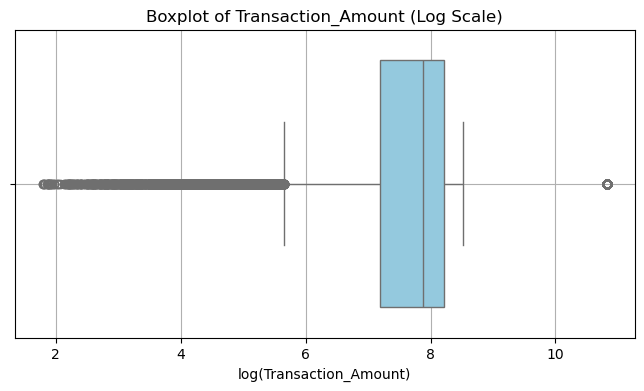

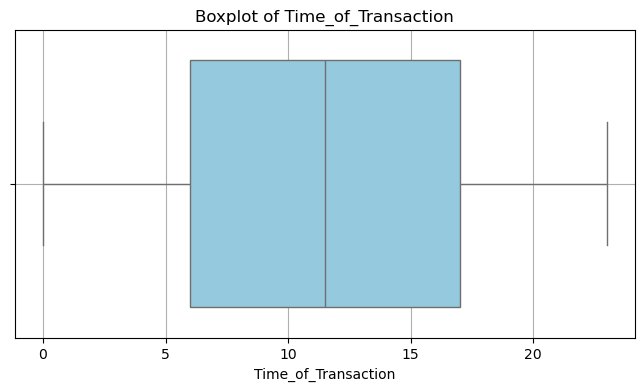

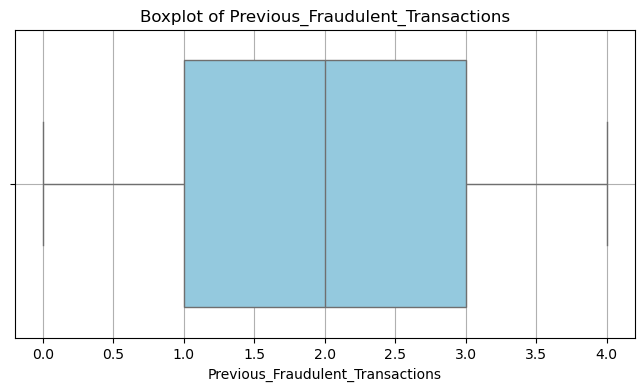

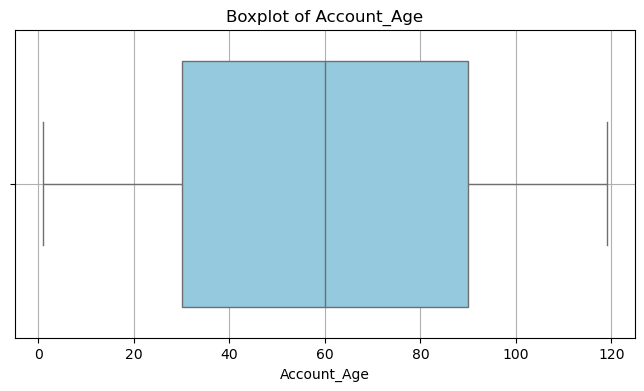

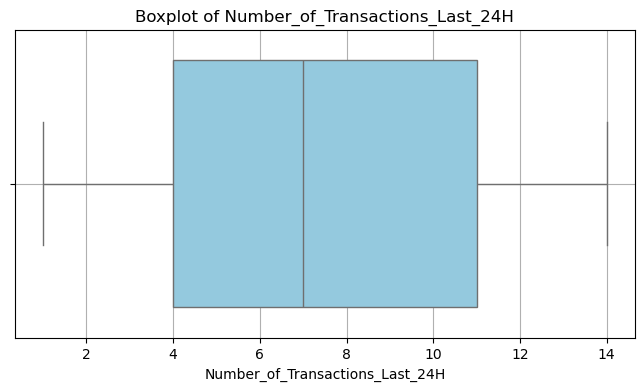

In [1398]:
import matplotlib.pyplot as plt
import seaborn as sns
selected_cols = [
    'Transaction_Amount',
    'Time_of_Transaction',
    'Previous_Fraudulent_Transactions',
    'Account_Age',
    'Number_of_Transactions_Last_24H'
]

# Plotting boxplots with seaborn to better visualize outliers
for col in selected_cols:
    plt.figure(figsize=(8, 4))
    
    # If data is highly skewed, use log scale (optional)
    if data[col].max() > 1000:
        sns.boxplot(x=data[col].apply(lambda x: np.log1p(x)), color='skyblue')
        plt.title(f'Boxplot of {col} (Log Scale)')
        plt.xlabel(f'log({col})')
    else:
        sns.boxplot(x=data[col], color='skyblue')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

    plt.grid(True)
    plt.show()


In [1399]:
#Except for transaction , no serious outliers are detected , for transaction amount 
#only mulitple outliers are detected for minimum values , #wont drop them because outliers for fraud detection
#might be fraud

In [1400]:
data.head()
data=data.drop(['Transaction_ID','User_ID'],axis=1)

In [1401]:
# Reset index and drop the old one
data = data.reset_index(drop=True)


In [1402]:
data.head()

,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,1292.76,ATM Withdrawal,16.0000,Tablet,San Francisco,0,119,13,Debit Card,0
1,1554.58,ATM Withdrawal,13.0000,Mobile,New York,4,79,3,Credit Card,0
2,2395.02,ATM Withdrawal,11.4884,Mobile,Unknown,3,115,9,Unknown,0
3,100.10,Bill Payment,15.0000,Desktop,Chicago,4,3,4,UPI,0
4,1490.50,POS Payment,19.0000,Mobile,San Francisco,2,57,7,Credit Card,0


In [1403]:
#lets create some graphs for the dataset features

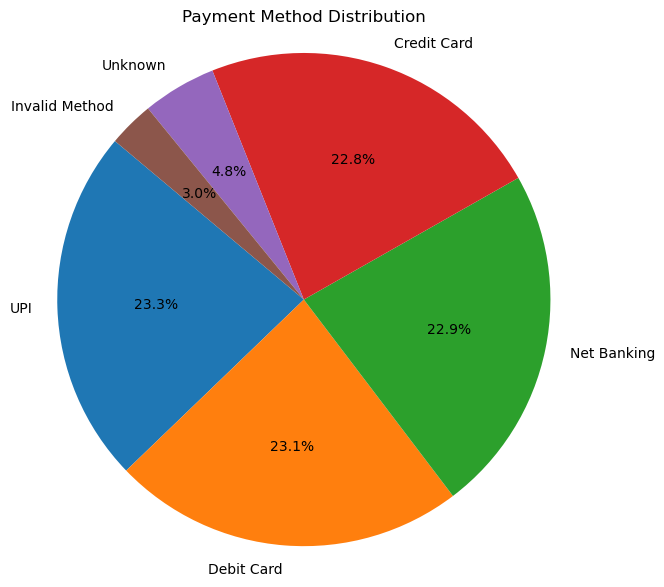

In [1404]:
# Count Payment Methods
payment_counts = data['Payment_Method'].value_counts()

# Plotting Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(payment_counts, 
        labels=payment_counts.index, 
        autopct='%1.1f%%', 
        startangle=140)

plt.title('Payment Method Distribution')
plt.axis('equal')  # To make it a perfect circle
plt.show()

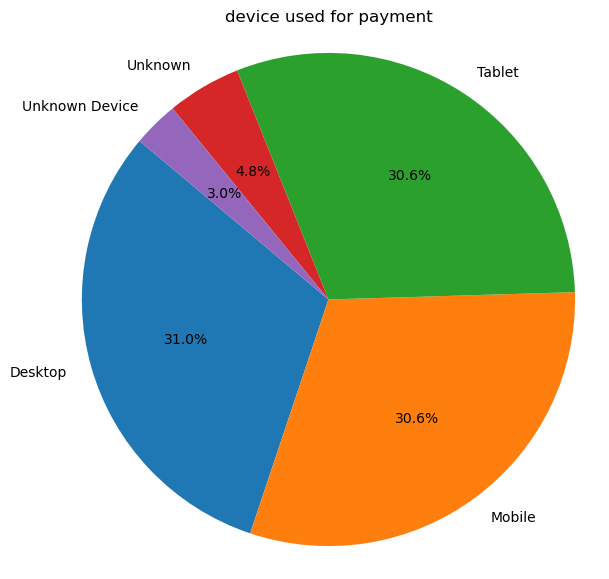

In [1405]:
# Count Payment Methods
payment_counts = data['Device_Used'].value_counts()

# Plotting Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(payment_counts, 
        labels=payment_counts.index, 
        autopct='%1.1f%%', 
        startangle=140)

plt.title('device used for payment')
plt.axis('equal')  # To make it a perfect circle
plt.show()

In [1406]:
! pip install folium

In [1407]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
import time


# Get location counts
location_counts = data['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Frequency']

# Initialize geolocator
geolocator = Nominatim(user_agent="location_mapper")

# Get lat/lon for locations
def get_coordinates(location):
    try:
        time.sleep(1)  # to avoid geopy rate limit
        loc = geolocator.geocode(location)
        if loc:
            return pd.Series([loc.latitude, loc.longitude])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

location_counts[['Lat', 'Lon']] = location_counts['Location'].apply(get_coordinates)

# Drop missing
location_counts.dropna(subset=['Lat', 'Lon'], inplace=True)

# Initialize map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers
for idx, row in location_counts.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Lon']],
        radius=row['Frequency'] * 0.5,  # bubble size
        popup=f"{row['Location']} - {row['Frequency']} transactions",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(marker_cluster)

# Display map
m


In [1408]:
#lets check most fraud attempts from which device where made so we can be extra suspicious for some devices 

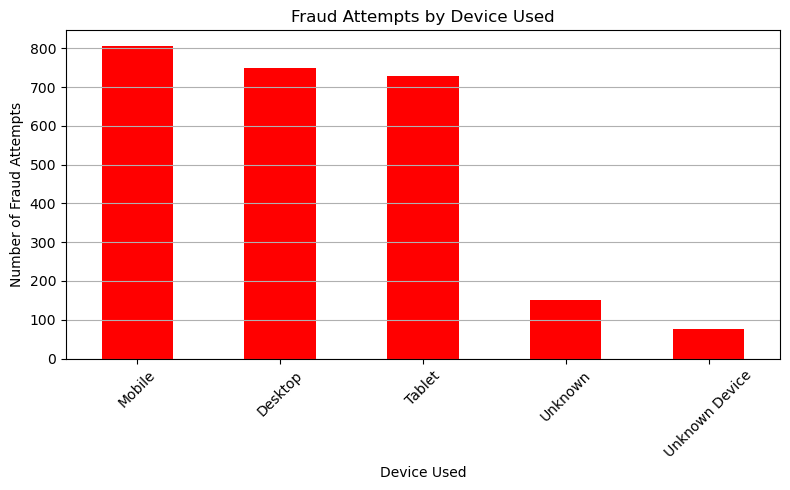

In [1409]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by device and count fraud attempts
fraud_by_device = data.groupby('Device_Used')['Fraudulent'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8, 5))
fraud_by_device.plot(kind='bar', color='red')
plt.title('Fraud Attempts by Device Used')
plt.xlabel('Device Used')
plt.ylabel('Number of Fraud Attempts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [1410]:
#mobile devices seem to be suspicous for transactions because most fraud attempts where tried from mobiles


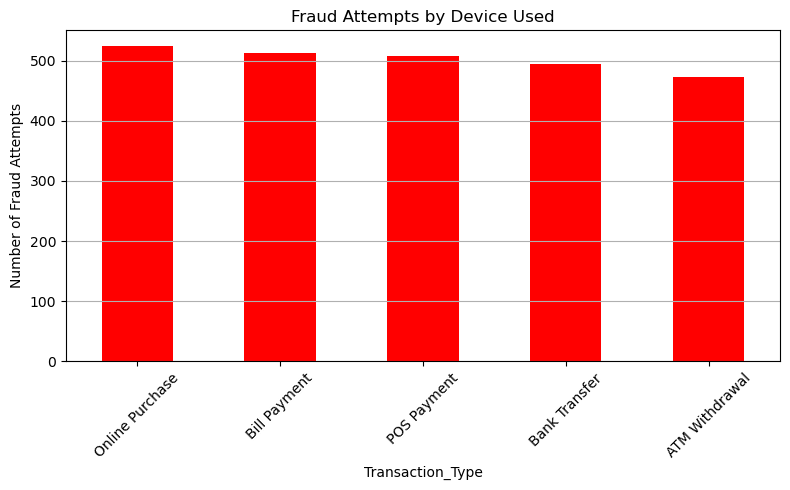

In [1411]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by device and count fraud attempts
fraud_by_device = data.groupby('Transaction_Type')['Fraudulent'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8, 5))
fraud_by_device.plot(kind='bar', color='red')
plt.title('Fraud Attempts by Device Used')
plt.xlabel('Transaction_Type')
plt.ylabel('Number of Fraud Attempts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [1412]:
#We can also see that online purchases have the most fraud attempts for transaction

In [1413]:
data.head()

,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,1292.76,ATM Withdrawal,16.0000,Tablet,San Francisco,0,119,13,Debit Card,0
1,1554.58,ATM Withdrawal,13.0000,Mobile,New York,4,79,3,Credit Card,0
2,2395.02,ATM Withdrawal,11.4884,Mobile,Unknown,3,115,9,Unknown,0
3,100.10,Bill Payment,15.0000,Desktop,Chicago,4,3,4,UPI,0
4,1490.50,POS Payment,19.0000,Mobile,San Francisco,2,57,7,Credit Card,0


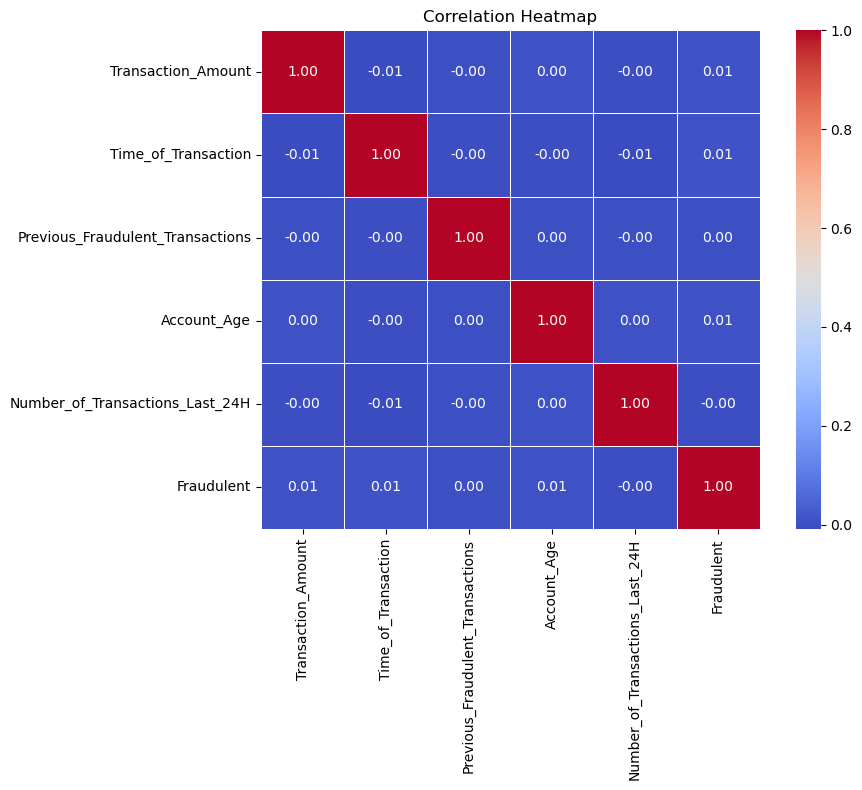

In [1414]:
#lets perform correlation heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate correlation matrix for numerical columns only
corr_matrix = data.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,          # show correlation values
            fmt='.2f',           # decimal format
            cmap='coolwarm',     # color scheme
            square=True,         
            linewidths=0.5)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [1415]:
#No high corrlation between features can be seen

In [1416]:
data.head()

,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,1292.76,ATM Withdrawal,16.0000,Tablet,San Francisco,0,119,13,Debit Card,0
1,1554.58,ATM Withdrawal,13.0000,Mobile,New York,4,79,3,Credit Card,0
2,2395.02,ATM Withdrawal,11.4884,Mobile,Unknown,3,115,9,Unknown,0
3,100.10,Bill Payment,15.0000,Desktop,Chicago,4,3,4,UPI,0
4,1490.50,POS Payment,19.0000,Mobile,San Francisco,2,57,7,Credit Card,0


In [1417]:
data.dtypes


Transaction_Amount                  float64
Transaction_Type                     object
Time_of_Transaction                 float64
Device_Used                          object
Location                             object
Previous_Fraudulent_Transactions      int64
Account_Age                           int64
Number_of_Transactions_Last_24H       int64
Payment_Method                       object
Fraudulent                            int64
dtype: object

In [1418]:
# Label Encoding for categorical variables
label_encoders = {}
categorical_cols = ['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [1419]:
data.head()

,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,1292.76,0,16.0000,2,6,0,119,13,1,0
1,1554.58,0,13.0000,1,5,4,79,3,0,0
2,2395.02,0,11.4884,1,8,3,115,9,5,0
3,100.10,2,15.0000,0,1,4,3,4,4,0
4,1490.50,4,19.0000,1,6,2,57,7,0,0


In [1420]:
data.dtypes

Transaction_Amount                  float64
Transaction_Type                      int64
Time_of_Transaction                 float64
Device_Used                           int64
Location                              int64
Previous_Fraudulent_Transactions      int64
Account_Age                           int64
Number_of_Transactions_Last_24H       int64
Payment_Method                        int64
Fraudulent                            int64
dtype: object

In [1421]:
#Now all objects are label encoded and turned into numerical data 

                            Feature  Mutual_Info
4                          Location     0.002680
5  Previous_Fraudulent_Transactions     0.002267
1                  Transaction_Type     0.002227
3                       Device_Used     0.002096
8                    Payment_Method     0.001648
0                Transaction_Amount     0.000347
7   Number_of_Transactions_Last_24H     0.000169
2               Time_of_Transaction     0.000000
6                       Account_Age     0.000000


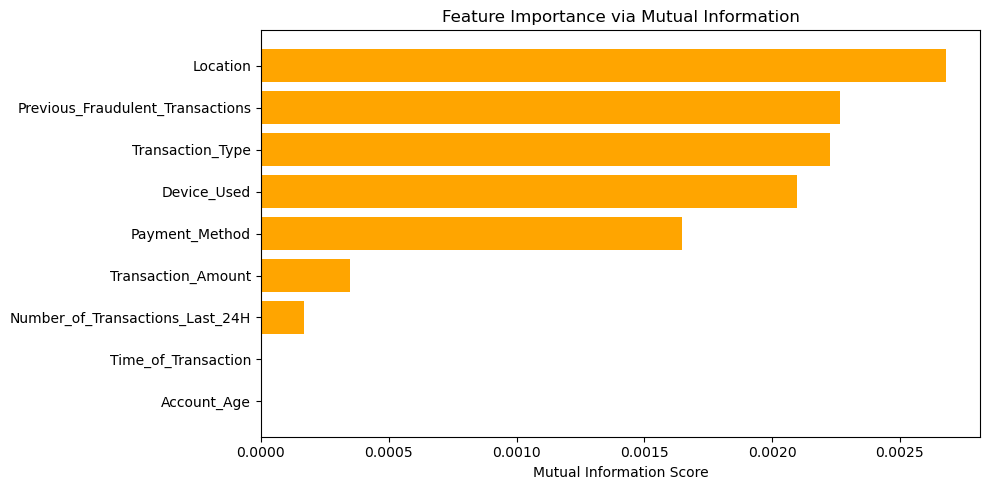

In [1422]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Split Features and Target
X = data.drop('Fraudulent', axis=1)
y = data['Fraudulent']

# Mutual Info Calculation
mi = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Create DataFrame
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual_Info': mi
}).sort_values(by='Mutual_Info', ascending=False)

print(mi_df)

# Plot
plt.figure(figsize=(10, 5))
plt.barh(mi_df['Feature'], mi_df['Mutual_Info'], color='orange')
plt.xlabel('Mutual Information Score')
plt.title('Feature Importance via Mutual Information')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [1423]:
#Suprisingly the trnasaction amount has a small mutual info score , the time of transaction as well , i decide to keep
#them though

In [1424]:
X = data.drop(columns=['Fraudulent'])  # Features
y = data['Fraudulent'] 

In [1425]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1469]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample



# --- 70:30 UNDERSAMPLING ---
X_maj = X_train[y_train == 0]
X_min = X_train[y_train == 1]
y_maj = y_train[y_train == 0]
y_min = y_train[y_train == 1]

n_min = len(y_min)
n_maj = int(n_min * (70 / 30))  # 70% legit, 30% fraud

X_maj_down = resample(X_maj, replace=False, n_samples=n_maj, random_state=42)
y_maj_down = y_maj.loc[X_maj_down.index]

X_bal = pd.concat([X_maj_down, X_min])
y_bal = pd.concat([y_maj_down, y_min])

# --- SCALE ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_bal)
X_test_scaled = scaler.transform(X_test)

# --- KERAS MODEL BUILDER ---
def build_model(hidden_layers=1, neurons=32, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation=activation))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# --- WRAP IT FOR SKLEARN ---
clf = KerasClassifier(model=build_model, verbose=0)

# --- GRID SEARCH PARAMS ---
param_grid = {
    "model__hidden_layers": [1, 2, 3],
    "model__neurons": [16, 32, 64],
    "model__activation": ['relu', 'tanh'],
    "model__optimizer": ['adam', 'rmsprop'],
    "batch_size": [32, 64],
    "epochs": [20, 30]
}

# --- GRID SEARCH ---
grid = GridSearchCV(clf, param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)
grid.fit(X_train_scaled, y_bal)

print("Best Params:", grid.best_params_)

# --- EVALUATION ---
y_pred = grid.predict(X_test_scaled)
y_pred = np.round(y_pred)

print("\n📊 Neural Network (Keras) Results:")
print(classification_report(y_test, y_pred, target_names=["Non-Fraud", "Fraud"]))


Fitting 3 folds for each of 144 candidates, totalling 432 fits


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwa

[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=1, model__neurons=16, model__optimizer=adam; total time=   6.0s
[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=1, model__neurons=64, model__optimizer=rmsprop; total time=   3.8s
[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=1, model__neurons=64, model__optimizer=rmsprop; total time=   4.3s
[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=2, model__neurons=32, model__optimizer=adam; total time=   4.6s
[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=2, model__neurons=64, model__optimizer=rmsprop; total time=   4.6s
[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=3, model__neurons=16, model__optimizer=rmsprop; total time=   4.4s
[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=3, model__neurons=64, model__optimizer=adam;

In [1480]:
#The dataset is very small to train a neural network , as well as inbalanced even after grid search results cant 
#be good, 
#lets try a decision tree , logistic regression and random forest 

In [1482]:
data.head()

,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,1292.76,0,16.0000,2,6,0,119,13,1,0
1,1554.58,0,13.0000,1,5,4,79,3,0,0
2,2395.02,0,11.4884,1,8,3,115,9,5,0
3,100.10,2,15.0000,0,1,4,3,4,4,0
4,1490.50,4,19.0000,1,6,2,57,7,0,0



🔻 UNDERSAMPLING (70:30):

📊 LogisticRegression (Undersampling)
Accuracy : 0.9508
Precision: 0.0000
Recall   : 0.0000
F1 Score : 0.0000
ROC AUC  : 0.4815


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 RandomForestClassifier (Undersampling)
Accuracy : 0.9316
Precision: 0.0950
Recall   : 0.0458
F1 Score : 0.0618
ROC AUC  : 0.5144

📊 SVC (Undersampling)
Accuracy : 0.9507
Precision: 0.0000
Recall   : 0.0000
F1 Score : 0.0000
ROC AUC  : 0.4817

📊 KNeighborsClassifier (Undersampling)
Accuracy : 0.8021
Precision: 0.0428
Recall   : 0.1414
F1 Score : 0.0657
ROC AUC  : 0.4771

📊 DecisionTreeClassifier (Undersampling)
Accuracy : 0.6499
Precision: 0.0483
Recall   : 0.3267
F1 Score : 0.0841
ROC AUC  : 0.4967


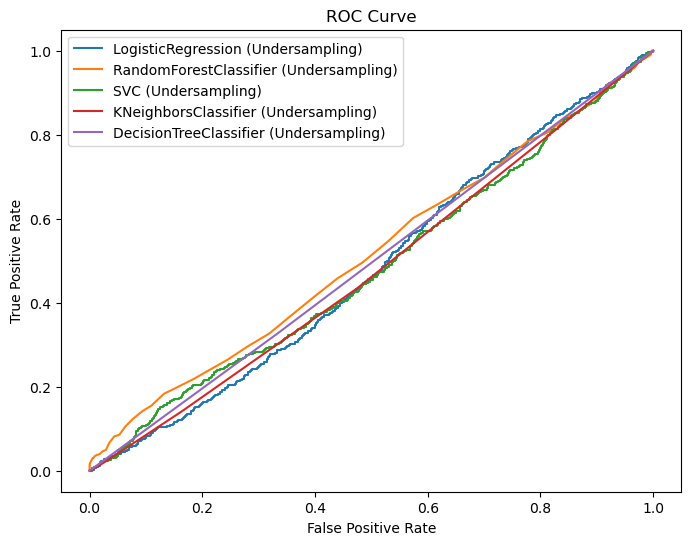


💥 SMOTE:

📊 LogisticRegression (SMOTE)
Accuracy : 0.5186
Precision: 0.0474
Recall   : 0.4602
F1 Score : 0.0860
ROC AUC  : 0.4836

📊 RandomForestClassifier (SMOTE)
Accuracy : 0.9516
Precision: 0.7500
Recall   : 0.0239
F1 Score : 0.0463
ROC AUC  : 0.4963

📊 SVC (SMOTE)
Accuracy : 0.5902
Precision: 0.0468
Recall   : 0.3785
F1 Score : 0.0833
ROC AUC  : 0.4867

📊 KNeighborsClassifier (SMOTE)
Accuracy : 0.7468
Precision: 0.0454
Recall   : 0.2072
F1 Score : 0.0745
ROC AUC  : 0.4857

📊 DecisionTreeClassifier (SMOTE)
Accuracy : 0.8919
Precision: 0.0762
Recall   : 0.1076
F1 Score : 0.0892
ROC AUC  : 0.5200


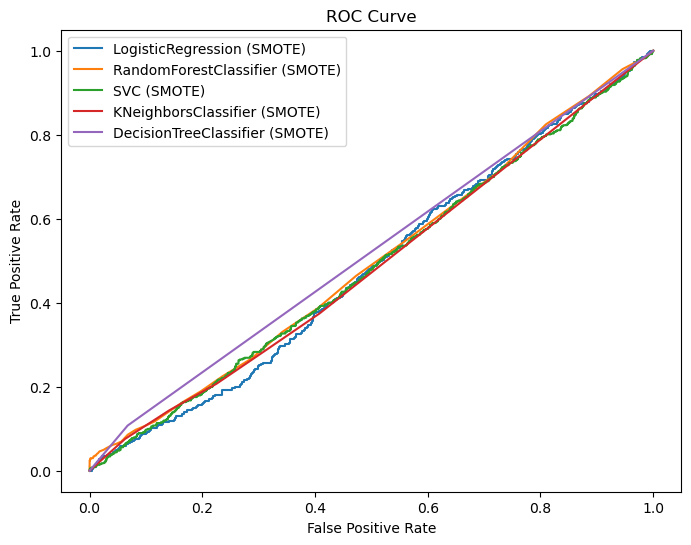

In [1484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample


# --- SPLIT DATA ---
X = data.drop('Fraudulent', axis=1)
y = data['Fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# --- SCALING ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- MODEL DICTIONARY ---
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# --- EVALUATION FUNCTION ---
def evaluate_model(model, X_train, y_train, title_suffix=""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else y_pred

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"\n📊 {model.__class__.__name__} ({title_suffix})")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"ROC AUC  : {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{model.__class__.__name__} ({title_suffix})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

# --- 1. UNDERSAMPLING 70:30 ---
X_legit = X_train[y_train == 0]
X_fraud = X_train[y_train == 1]
y_legit = y_train[y_train == 0]
y_fraud = y_train[y_train == 1]

n_fraud = len(y_fraud)
n_legit = int(n_fraud * (70 / 30))

X_legit_down = resample(X_legit, replace=False, n_samples=n_legit, random_state=42)
y_legit_down = y_legit.loc[X_legit_down.index]

X_under = pd.concat([X_legit_down, X_fraud])
y_under = pd.concat([y_legit_down, y_fraud])

# Shuffle
X_under = X_under.sample(frac=1, random_state=42)
y_under = y_under.loc[X_under.index]

X_under_scaled = scaler.fit_transform(X_under)

# --- EVALUATE UNDERSAMPLING ---
print("\n🔻 UNDERSAMPLING (70:30):")
plt.figure(figsize=(8, 6))
for name, model in models.items():
    evaluate_model(model, X_under_scaled, y_under, title_suffix="Undersampling")
plt.show()

# --- 2. SMOTE ---
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

# --- EVALUATE SMOTE ---
print("\n💥 SMOTE:")
plt.figure(figsize=(8, 6))
for name, model in models.items():
    evaluate_model(model, X_smote, y_smote, title_suffix="SMOTE")
plt.show()
